#### Import library

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
import seaborn as sns
import os

#### Reading dataset

In [37]:
mnist_train=pd.read_csv('mnist_train.csv')
mnist_test=pd.read_csv('mnist_test.csv')

In [38]:
# mnist_train.shape
# mnist_test.shape
mnist_train.isnull().any().describe()

count       785
unique        1
top       False
freq        785
dtype: object

In [39]:
mnist_train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
mnist_train['label'].value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: label, dtype: int64

In [47]:
# y_train2=mnist_train['label'].copy
x_train=mnist_train.drop(['label'],axis=1).values
y_train=mnist_train.label.values

In [48]:
# x_train
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=int64)

(array([5923., 6742., 5958., 6131., 5842., 5421., 5918., 6265., 5851.,
        5949.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

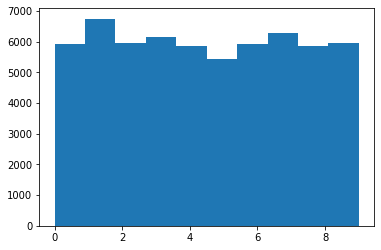

In [51]:
plt.hist(y_train)

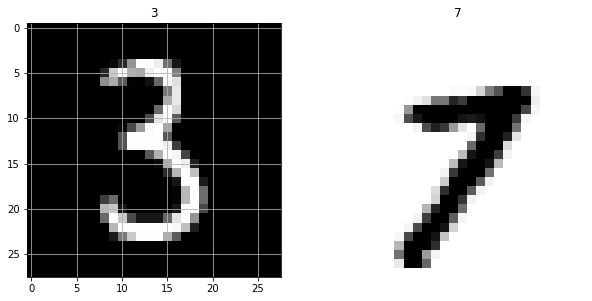

In [52]:
plt.figure(figsize=(10,8))
img1=x_train[54930]
img1=img1.reshape((28,28))
plt.subplot(1,2,1)
plt.imshow(img1,cmap='gray')
plt.title(y_train[54930])
plt.grid()

img2=x_train[40000]
img2=img2.reshape((28,28))
plt.subplot(1,2,2)
plt.imshow(img2,cmap=matplotlib.cm.binary,interpolation="nearest")
plt.title(y_train[40000])
plt.axis("off")
plt.grid()

plt.show()

## 3.1 Feature Scaling / Normalization

In [53]:
# X_train_scaled = x_train.copy()
# X_train_scaled = X_train_scaled / 255.0

In [54]:
 shuffle_index=np.random.permutation(60000)
    
x_train,y_train=x_train[shuffle_index],y_train[shuffle_index]

# 4.1 Logistic Regression

##### Creating a 2-detector

In [55]:
y_train=y_train.astype(np.int8)
y_train_2_det=(y_train==2)

In [56]:
from sklearn.linear_model import LogisticRegression
#LogisticRegression is a classification algo

In [57]:
y_train_2_det

array([False, False, False, ..., False, False, False])

In [58]:
LR_clf=LogisticRegression(tol=0.1)

In [59]:
LR_clf.fit(x_train,y_train_2_det)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.1, verbose=0,
                   warm_start=False)

In [60]:
any_digit=x_train[19930]
LR_clf.predict([any_digit])

array([False])

### Cross validation

In [61]:
from sklearn.model_selection import cross_val_score


In [69]:
a=cross_val_score(LR_clf,x_train,y_train_2_det,cv=3,scoring="accuracy")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [70]:
a.mean()

0.9779666666666668

# 4.2 SVM

In [83]:
# from sklearn.svm import SVC

In [ ]:
'''I am commenting out this section since it is taking too much time, 
but feel free to uncomment and run it.
'''

# svc_clf = SVC(gamma='auto', random_state=42, verbose=True)
# svc_clf.fit(x_train, y_train)




[LibSVM]

# 5. Evaluate models

In [75]:
x_test=mnist_test.drop(['label'],axis=1).values
y_test=mnist_test.label.values

In [76]:
y_test=y_test.astype(np.int8)
y_test_2_det=(y_test==2)

In [ ]:
from sklearn.metrics import accuracy_score

In [77]:
'''I am commenting out this section since it is taking too much time, 
but feel free to uncomment and run it.
'''
# svc_prediction = svc_clf.predict(x_test)
# print("SVC Accuracy:", accuracy_score(y_true=y_test ,y_pred=svc_prediction))

In [79]:
LR_Pred_y=LR_clf.predict(x_test)
print("LR Accuracy:", accuracy_score(y_true=y_test_2_det ,y_pred=LR_Pred_y))


LR Accuracy: 0.9791


## 6. Classification Report

In [80]:
from sklearn.metrics import classification_report

In [82]:
print(classification_report(y_test_2_det,LR_Pred_y))  #classification report for logistic regression

              precision    recall  f1-score   support

       False       0.98      0.99      0.99      8968
        True       0.95      0.84      0.89      1032

    accuracy                           0.98     10000
   macro avg       0.97      0.92      0.94     10000
weighted avg       0.98      0.98      0.98     10000



In [ ]:
'''I am commenting out this section since it is taking too much time, 
but feel free to uncomment and run it.
'''
# print(classification_report(y_test_2_det,svc_prediction))